In [80]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
import re 
import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer , WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.utils import pad_sequences   # to equalize the length of sentences 
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM
# PorterStemmer  ==> stemming  
# WordNetLemmatizer  ==> lemmataization 

In [23]:
train_data = open('./Data/train.txt').readlines() 
val_data = open('./Data/val.txt').readlines() 
test_data = open('./Data/test.txt').readlines() 


In [24]:
len(train_data) , len(val_data)  , len(test_data)

(16000, 2000, 2000)

In [25]:
full_data = train_data + test_data + val_data 
len(full_data)

20000

In [26]:
x = []
y = []

for line in full_data:
    text, label = line.strip().split(';')
    x.append(text)
    y.append(label)

In [27]:
len(x) , len(y)  

(20000, 20000)

In [28]:
labels = list(set(y))
labels

['joy', 'surprise', 'fear', 'anger', 'sadness', 'love']

In [29]:
df = pd.DataFrame({'message':x,'label':y})
df.head()

,message,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [30]:
### bar plot and pie plot  
df['label'].value_counts()

label
joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: count, dtype: int64

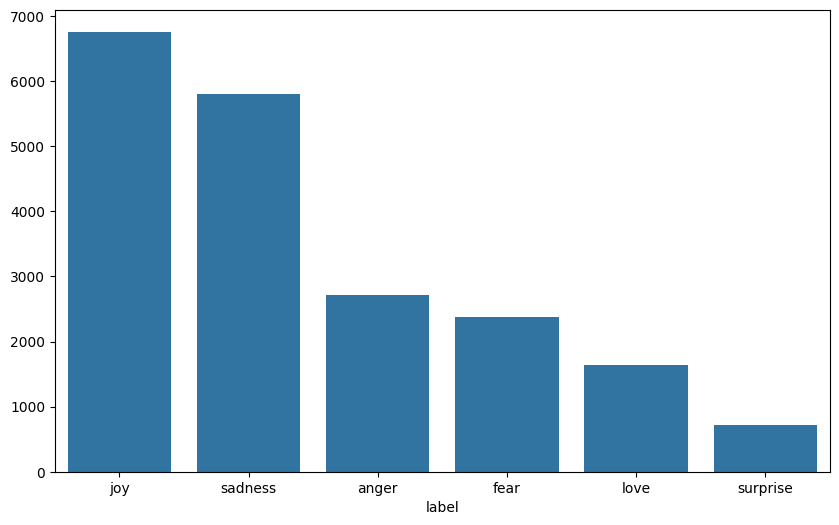

In [31]:
counts = df['label'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts.values)
plt.show()

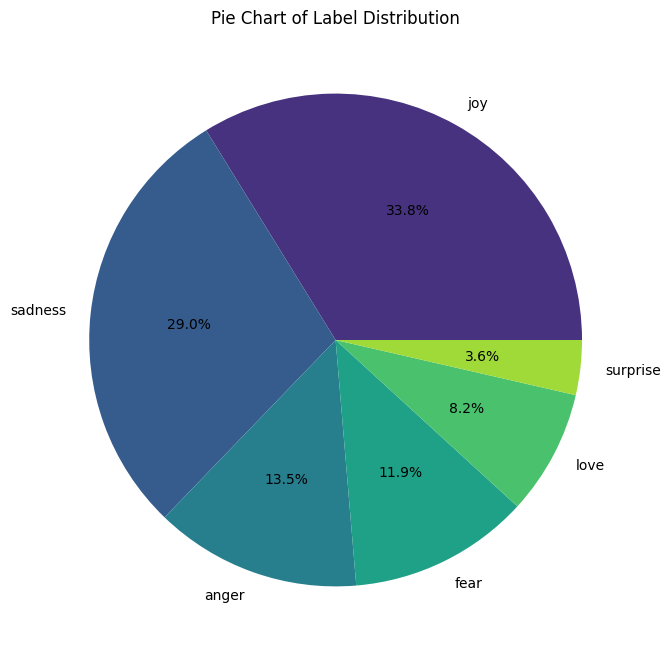

In [32]:
label_counts = df['label'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%2.1f%%', colors=sns.color_palette('viridis', len(label_counts)))
plt.title('Pie Chart of Label Distribution')
plt.show()

In [33]:
### wordcloud 
# install 2 line code wordcloud  


In [34]:
## text cleaning function 
def text_cleaning(messages,stemming):
    clean_data = []
    for message in messages: 
        message = message.lower()
        ls_of_words = nltk.word_tokenize(message)  # 
        word_without_stop_words = [word for word in ls_of_words if word not in stopwords.words('english')]
        ls_of_stemmed_words = [stemming.stem(word) for word in word_without_stop_words]
        clean_message = " ".join(ls_of_stemmed_words) 
        clean_data.append(clean_message)
    return clean_data 

stemming =  PorterStemmer()
clean_data = text_cleaning(messages=x,stemming=stemming)  # calling 

In [36]:
import os, joblib 
os.makedirs('clean_data',exist_ok=True) 
joblib.dump(clean_data,"./clean_data/clean_text.lb")

['./clean_data/clean_text.lb']

In [35]:
## single message 
message = x[1]
message = message.lower()
# message.split()

ls_of_words = nltk.word_tokenize(message)  # message.split()   

word_without_stop_words = [word for word in ls_of_words if word not in stopwords.words('english')]
stemming = PorterStemmer()
print(word_without_stop_words)
stemmed_words = [ ]
for word in word_without_stop_words: 
    stemmed_words.append(stemming.stem(word)) 
print(stemmed_words)
" ".join(stemmed_words) 

['go', 'feeling', 'hopeless', 'damned', 'hopeful', 'around', 'someone', 'cares', 'awake']
['go', 'feel', 'hopeless', 'damn', 'hope', 'around', 'someon', 'care', 'awak']


'go feel hopeless damn hope around someon care awak'

In [43]:
### text to numerical representation 
tokenizer = Tokenizer(oov_token='<nothing>') 
tokenizer.fit_on_texts(clean_data)

In [40]:
len(clean_data)

20000

In [41]:
clean_data[0]

'didnt feel humili'

In [46]:
# tokenizer.word_index

In [47]:
sequence = tokenizer.texts_to_sequences(clean_data)

In [50]:
# tokenizer.word_index 
sequence[0]

[61, 2, 522]

In [51]:
len(sequence)

20000

In [59]:
sequence[0:5]

[[61, 2, 522],
 [10, 2, 419, 682, 67, 50, 60, 96, 1229],
 [4, 1230, 431, 107, 2, 432, 192],
 [92, 2, 592, 3696, 7, 21, 2844],
 [2, 918]]

In [57]:
 ## x data ready 
sequences = pad_sequences(sequence,padding='post' , maxlen= max(list(map(len,sequence))))

In [66]:
labels = list(set(y))
labels

['joy', 'surprise', 'fear', 'anger', 'sadness', 'love']

In [70]:
label_dict = {label:i for i, label in enumerate(labels)} 
label_dict

{'joy': 0, 'surprise': 1, 'fear': 2, 'anger': 3, 'sadness': 4, 'love': 5}

In [74]:
y_labeled = []
for label in y: 
    y_labeled.append(label_dict[label])

labels = np.array(y_labeled)

In [75]:
labels 

array([4, 4, 3, ..., 0, 0, 0])

In [90]:
# sequences  ==>  X DATA   
# labels     ==>  Y DATA   
#  training testing splitting  
x_train,x_test,y_train,y_test = train_test_split(sequences,labels,test_size=0.16)

In [86]:
## model training steps  or algorithm  
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM 

model = Sequential([LSTM(units=64,input_shape=(35,1),return_sequences=True),  # hidden layer 1
                   LSTM(units=32), # hidden layer 2 
                   Dense(units=6,activation='softmax')])  # output layer 

model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
model.summary()
# binary classification == > binary_crossentropy 
# multi class classification  ==> categorical_crossentropy , sparse_categorical_crossentropy   

# y 
# labelencod ==>  sparse_categorical_crossentropy
# onehotencode ==> categorical_crossentropy

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                   ┃ Output Shape           ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                  │ (None, 35, 64)         │       16,896 │
├────────────────────────────────┼────────────────────────┼──────────────┤
│ lstm_7 (LSTM)                  │ (None, 32)             │       12,416 │
├────────────────────────────────┼────────────────────────┼──────────────┤
│ dense_3 (Dense)                │ (None, 6)              │          198 │
└────────────────────────────────┴────────────────────────┴──────────────┘

 Total params: 29,510 (115.27 KB)

 Trainable params: 29,510 (115.27 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
### train the algorithm  
history = model.fit(x_train,y_train,epochs=8,validation_data=(x_test,y_test))

Epoch 1/8
525/525 ━━━━━━━━━━━━━━━━━━━━ 34s 53ms/step - accuracy: 0.3210 - loss: 1.6097 - val_accuracy: 0.3534 - val_loss: 1.5540
Epoch 2/8
525/525 ━━━━━━━━━━━━━━━━━━━━ 37s 46ms/step - accuracy: 0.3328 - loss: 1.5839 - val_accuracy: 0.3375 - val_loss: 1.5561
Epoch 3/8
525/525 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.3317 - loss: 1.5844 - val_accuracy: 0.3534 - val_loss: 1.5546
Epoch 4/8
525/525 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.3336 - loss: 1.5785 - val_accuracy: 0.3528 - val_loss: 1.5535
Epoch 5/8
525/525 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.3355 - loss: 1.5809 - val_accuracy: 0.3534 - val_loss: 1.5540
Epoch 6/8
525/525 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.3440 - loss: 1.5701 - val_accuracy: 0.3531 - val_loss: 1.5531
Epoch 7/8
525/525 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - accuracy: 0.3426 - loss: 1.5727 - val_accuracy: 0.3516 - val_loss: 1.5531
Epoch 8/8
525/525 ━━━━━━━━━━━━━━━━━━━━ 46s 48ms/step - accuracy: 0.3457 - loss: 1.5741 - val_accu

In [ ]:
# prediction 
# confusion matrix 
# model save 

<Axes: >

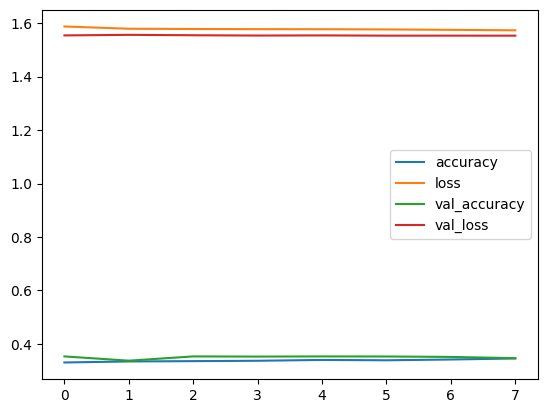

In [92]:
import pandas as pd 
pd.DataFrame(history.history).plot()

In [93]:
pred = model.predict(x_test)

100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


In [98]:
pred

array([[0.3393783 , 0.0454681 , 0.11137954, 0.10813805, 0.29778877,
        0.09784728],
       [0.3439758 , 0.03858981, 0.11470171, 0.12787813, 0.29372814,
        0.08112647],
       [0.2919557 , 0.03100449, 0.11937842, 0.14894296, 0.3541945 ,
        0.0545239 ],
       ...,
       [0.3432817 , 0.03994577, 0.11400665, 0.12830366, 0.2866508 ,
        0.0878114 ],
       [0.3327913 , 0.03593075, 0.11846045, 0.1340383 , 0.3075454 ,
        0.07123385],
       [0.3394752 , 0.04533076, 0.11187831, 0.10991017, 0.29541963,
        0.09798586]], dtype=float32)

In [97]:
x_test.shape

(3200, 35)

In [100]:
predictions = np.argmax(pred,axis=1)

In [101]:
y_test

array([0, 0, 0, ..., 3, 4, 5])

In [103]:
evaluation_df = pd.DataFrame({'actual':y_test,'prediction':predictions})
evaluation_df.head()

,actual,prediction
0,0,0
1,0,0
2,0,4
3,0,0
4,0,0


In [108]:
label = {0:'joy',1:'surprise',2:'fear',3:'anger',4:'sadness',5:'love'}
label

{0: 'joy', 1: 'surprise', 2: 'fear', 3: 'anger', 4: 'sadness', 5: 'love'}

In [110]:
evaluation_df['actual'] = evaluation_df['actual'].map(label)
evaluation_df['prediction'] = evaluation_df['prediction'].map(label)


In [111]:
evaluation_df.head(40)

,actual,prediction
0,joy,joy
1,joy,joy
2,joy,sadness
3,joy,joy
4,joy,joy
5,joy,joy
6,love,joy
7,sadness,joy
8,fear,joy
9,sadness,sadness


In [112]:
os.makedirs('prediction',exist_ok=True)
evaluation_df.to_csv('./prediction/prediction.csv',index=False)  

os.makedirs('models',exist_ok=True) 
model.save('./models/lstm_model.h5')
 # saved 